1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

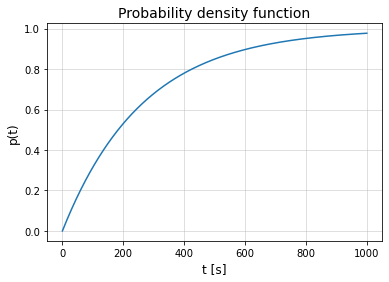

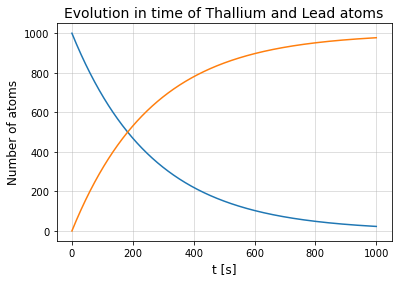

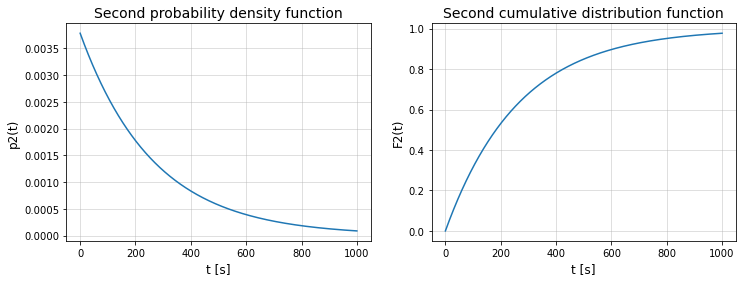

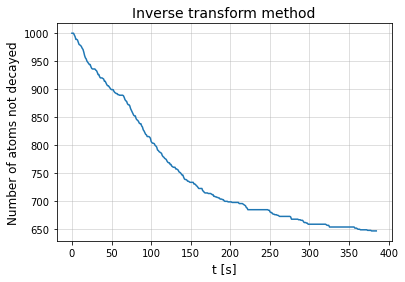

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

tau = 3.052*60        # Conversion from minutes to seconds.
thallium_atoms = 1000 # Initial number of samples for Thallium atoms.
lead_atoms = 0        # Initial number of samples for Lead atoms.

# Definition of the probability density function.
def pdf(t,tau):
    p = 1 - 2**(-t/tau)
    return p

# Definition of the cumulative distribution function.
def cdf(t,tau):
    F = t + (2**(-t/tau)-1)*(tau/math.log(2))
    return F


# Time vector with step=1.
t = np.linspace(0,thallium_atoms,thallium_atoms)

# PDF.
p = pdf(t,tau)

# Plot of the probability density function.
plt.figure(figsize=(6,4))
plt.plot(t,p)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('p(t)',size=12)
plt.title('Probability density function',size=14)
plt.show()

# Evolution of the number of Thallium atoms in time.
thallium_time = np.zeros(thallium_atoms)

# Evolution of the number of Thallium atoms in time.
lead_time = np.zeros(thallium_atoms)

# At each time-step decide whether each TI atom has decayed or not, accordingly to the pdf.
for i in range(thallium_atoms):
    thallium_time[i] = thallium_atoms-p[i]*thallium_atoms
    lead_time[i] = p[i]*thallium_atoms

# Plot the evolution in time of Thallium and Lead atoms.
plt.figure(figsize=(6,4))
plt.plot(t,thallium_time)
plt.plot(t,lead_time)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('Number of atoms',size=12)
plt.title('Evolution in time of Thallium and Lead atoms',size=14)
plt.show()

# Definition of the probability density function.
def pdf2(t,tau):
    p = 2**(-t/tau)*(math.log(2)/tau)
    return p

# Definition of the cumulative distribution function.
def cdf2(t,tau):
    F = 1 - 2**(-t/tau)
    return F

# Definition of the inverse cumulative distribution function.
def inv_cdf2(y,tau):
    t = np.zeros(len(y))
    for i in range(len(y)):
        t[i] = -tau*math.log((1-y[i]),2)
    return t

# PDF.
p2 = pdf2(t,tau)

# CDF.
F2 = cdf2(t,tau)

# Plot of the probability density function.
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t,p2)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('p2(t)',size=12)
plt.title('Second probability density function',size=14)

# Plot of the cumulative distribution function.
plt.subplot(122)
plt.plot(t,F2)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('F2(t)',size=12)
plt.title('Second cumulative distribution function',size=14)
plt.show()

u = np.random.random(1000)           # Generation of 1000 random numbers.
instants = inv_cdf2(u,tau)           # Apply the inverse of the CDF.
instants = np.sort(instants)         # Sort the time instants.
samples = np.linspace(0,1000,1000)   # Discrete time.
counts = np.zeros(1000)              # Counts in any interval.
count_index = 0

for i in range(1000):
    if instants[i] < samples[count_index]:     # If instants occur in the range [i-1;i] the number of counts
        counts[count_index] += 1               # in the correspondent interval increases.
    else:
        count_index += 1

total_count = np.sum(counts)
k = 0
decayed_per_time = []
while(np.sum(counts[:k])<total_count):
    decayed_per_time.append(np.sum(counts[:k]))
    k += 1

decayed_per_time = np.asarray(decayed_per_time) # At each instant it stores the number of decayed atoms.
not_decayed = (1000-decayed_per_time)           # At each instant it stores the number of not decayed atoms.

plt.figure(figsize=(6,4))
plt.plot(samples[:k],not_decayed)
plt.xlabel('t [s]',size=12)
plt.ylabel('Number of atoms not decayed',size=12)
plt.title('Inverse transform method',size=14)
plt.grid(alpha=0.5)
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/miss method:

I = 1.34974
Error: 0.002962569716310487

Mean value method:

I = 1.34974
Error: 0.0020679120468125845

The ratio between the hit/miss method and the mean value method:  0.6980129565990137


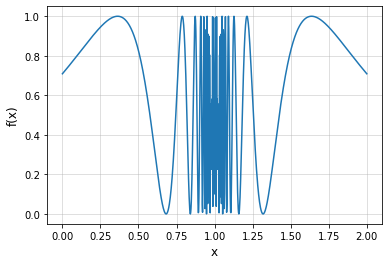

In [23]:
# Definition of the function f(x).
def f(x):
    return (np.sin(1/(1 - x)))**2

# Plot of the function f(x).
x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x))
plt.xlabel('x',size=12)
plt.ylabel('f(x)',size=12)
plt.grid(alpha=0.5)

# Monte Carlo integration.
N = 100000                      # Number of random points.

count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2.
    y = np.random.random()     # y is random uniform between 0 and 1.
    if y < f(x): count += 1

# Integral.
I = 2*count/T

# Compute the error.
error = (1-(-1))*np.sqrt(N*(count/N)*(1-count/N))/N

print('Hit/miss method:\n')
print('I =',I)
print('Error:',error)

# Mean value method.
x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()  # x is random uniform between 0 and 2.
    y[i] = f(x[i])  

# Integral.
I2 = ((1-(-1))*np.sum(y))/N

g_tilte = (1/N)*np.sum(y)
g_tilte2 = (1/N)*np.sum(y**2)

# Compute the error.
error2 = ((1-(-1))*np.sqrt((g_tilte2-g_tilte**2)/N))
    
print('\nMean value method:\n')
print('I =',I)
print('Error:',error2)
          
ratio = error2/error

print('\nThe ratio between the hit/miss method and the mean value method: ',ratio)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [24]:
# In both cases I used the mean value method.

# 2-Dimensional case.
T = 100000
count_for_area = 0
dimension = 2
for i in range(T):
    x = -1+2*np.random.random()
    y = -1+2*np.random.random()
    if (x**2+y**2 <= 1):
        count_for_area += 1        
Area = ((2**dimension)/T)*count_for_area 
print('Area for the circle:',Area)

# 10-Dimensional case.
count_for_area = 0
dimension = 10
vector_per_dimension = np.zeros(dimension)
for i in range(T):
    r = 0
    for n in range(dimension):
        vector_per_dimension[n] = -1+2*np.random.random()
    if (np.sum(vector_per_dimension**2) <= 1):
        count_for_area += 1
I = ((2**dimension)/T)*count_for_area 
print('Extension for dimension 10:',I)

Area for the circle: 3.13884
Extension for dimension 10: 2.8057600000000003


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [25]:
# Definition of f(x).
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

# Definition of w(x).
def w(x):
    return 1/(x**0.5)

# Definition of the inverse for the Inverse Transform method.
def inv(x):
    return x*x

N = 10000 # Number of random points.
y = np.zeros(N)
z = np.zeros(N)
for i in range(N):
    x = (np.random.random())
    x_hat = inv(x)
    y[i] = f(x_hat)
    z[i] = w(x_hat)

I = (1/N)*np.sum(y/z)*2 # Where 2 is the value of the integral of w(x) between 0 and 1.
print('Integral I =',I)

Integral I = 0.839696929268463
